# Gender Classification

by Abhishek Chatterjee (abhishekchatterjeejit@gmail.com)

https://imdeepmind.ml

In [1]:
# The dataset is in my google drive
# So this code is for downloading those dataset here in collab

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing pandas and numpy for data manapulation

import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('drive/My Drive/datasets/wiki_0.csv')

In [0]:
# Lets explore the dataset

data.head()

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,dob,photo_taken,gender,name
0,0,64,65,70,50,177,122,92,78,90,...,37,39,39,45,48,43,1981-05-05,2009,male,Sami Jauhojärvi
1,1,143,155,157,165,162,175,166,165,169,...,95,66,58,61,69,54,1925-04-04,1964,male,Dettmar Cramer
2,2,38,54,54,46,51,34,37,25,35,...,115,115,115,115,115,115,1948-07-03,2008,male,Marc Okrand
3,3,47,47,47,47,47,47,47,47,45,...,144,142,142,147,153,156,1971-05-31,2012,female,Diana Damrau
4,4,197,210,218,215,220,206,190,165,143,...,64,48,53,62,69,56,1960-11-09,2012,female,Krista Tippett


In [4]:
print(data.shape)
print(data.columns)

(36156, 4101)
Index(['Unnamed: 0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel4091', 'pixel4092', 'pixel4093', 'pixel4094', 'pixel4095',
       'pixel4096', 'dob', 'photo_taken', 'gender', 'name'],
      dtype='object', length=4101)


In [0]:
# Manapulating the data

data = data.drop(['Unnamed: 0', 'dob', 'photo_taken', 'name'], axis=1)
X = data.drop(['gender'], axis=1)
y = data['gender']

del data

X = X.values.reshape(-1,64,64,1)

X = X / 255.0

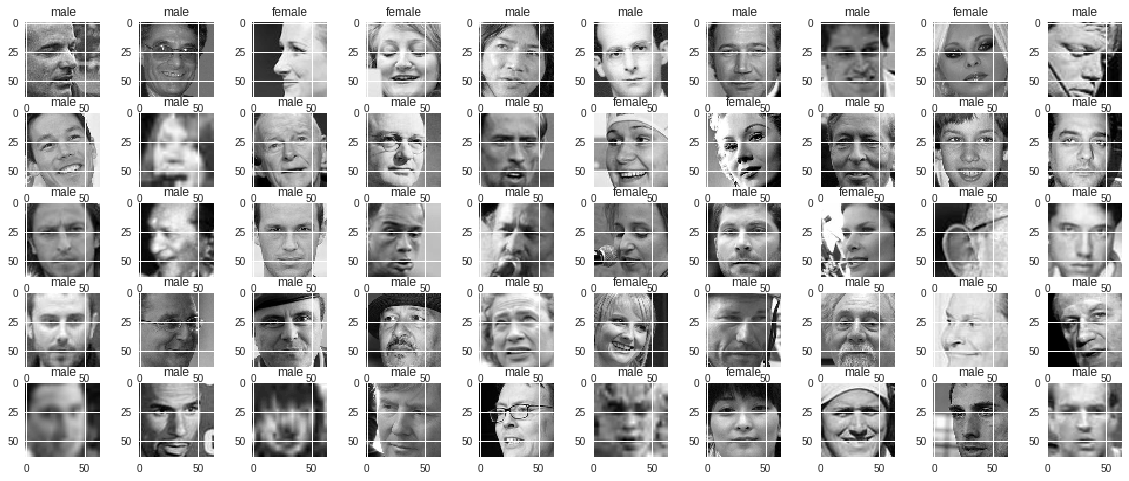

In [9]:
# Lets plot some of the images

import matplotlib.pyplot as plt

w=64
h=64
fig=plt.figure(figsize=(20, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[i].reshape(w,h), cmap='gray')
    plt.title(y[i])
plt.show()

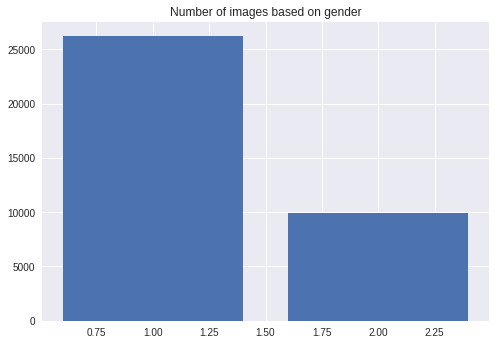

In [21]:
gender = y == 'male'
males = sum(gender)
females = len(y) - males

plt.bar([1,2],[males,females])
plt.title('Number of images based on gender')
plt.show()

In [0]:
# One Hot encoding
y = pd.get_dummies(y).values

In [0]:
# Spliting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=2)

del X, y

In [24]:
# The main model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = 3, strides=1, padding='same', activation = 'relu', input_shape = (64,64,1)))
model.add(Conv2D(filters = 16, kernel_size = 3, strides=1, padding='same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, strides=1, padding='same', activation = 'relu'))

model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters = 32, kernel_size = 3, strides=1, padding='same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, strides=1, padding='same',activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, strides=1, padding='same',activation = 'relu'))

model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.33))
model.add(Dense(units = 2, activation = 'softmax'))


datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=False,  
        vertical_flip=False)

datagen.fit(X_train)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
__________

In [26]:
# Training the model

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data = (X_test,y_test),
                    steps_per_epoch=len(X_train) / 32, epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
1017/1016 [==============================] - 34s 33ms/step - loss: 0.5201 - acc: 0.7654 - val_loss: 0.3590 - val_acc: 0.8581
Epoch 2/25
1017/1016 [==============================] - 29s 29ms/step - loss: 0.4049 - acc: 0.8346 - val_loss: 0.3276 - val_acc: 0.8709
Epoch 3/25
1017/1016 [==============================] - 29s 29ms/step - loss: 0.3675 - acc: 0.8553 - val_loss: 0.2992 - val_acc: 0.8902
Epoch 4/25
1017/1016 [==============================] - 29s 29ms/step - loss: 0.3476 - acc: 0.8666 - val_loss: 0.2841 - val_acc: 0.8960
Epoch 5/25
1017/1016 [==============================] - 29s 29ms/step - loss: 0.3352 - acc: 0.8725 - val_loss: 0.2746 - val_acc: 0.8985
Epoch 6/25
1017/1016 [==============================] - 29s 29ms/step - loss: 0.3242 - acc: 0.8793 - val_loss: 0.2711 - val_acc: 0.9032
Epoch 7/25
1017/1016 [==============================] - 29s 29ms/step - loss: 0.3156 - acc: 0.8814 - val_loss: 0.2659 - val_acc: 0.9046


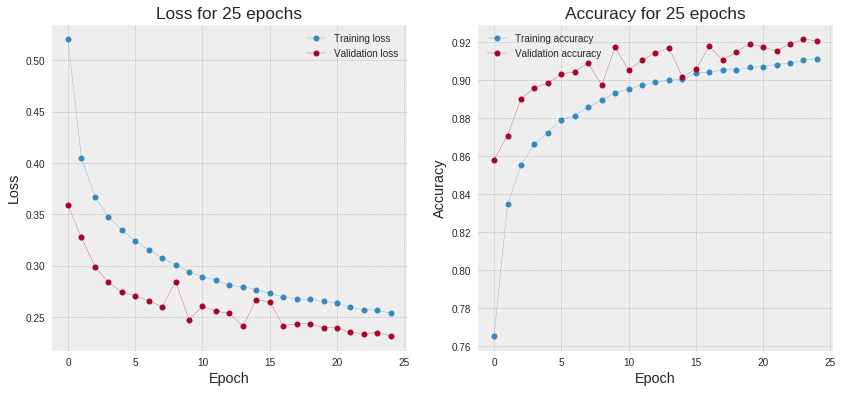

In [27]:
# Plotting the accuracy and loss

hist_df = pd.DataFrame(history.history)

fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.acc, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_acc, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
model.save('gender.h5')